### Priprava podatkov za obdelavo

In [45]:
from Classes import Data

data = Data()

### Računanje št. nesreč letal skozi leta

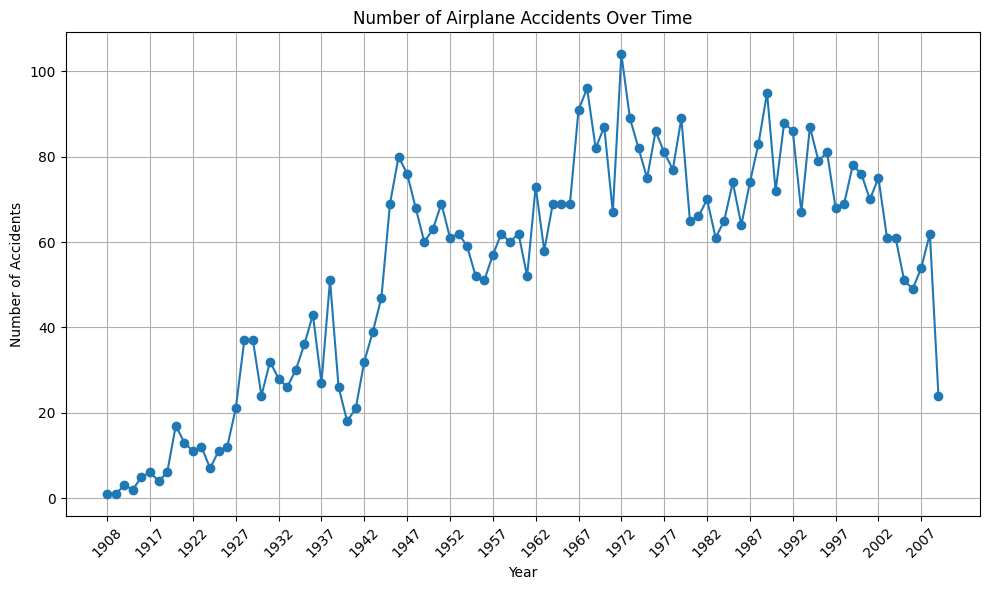

In [46]:
data.crashes_over_time() #mau niha pa to

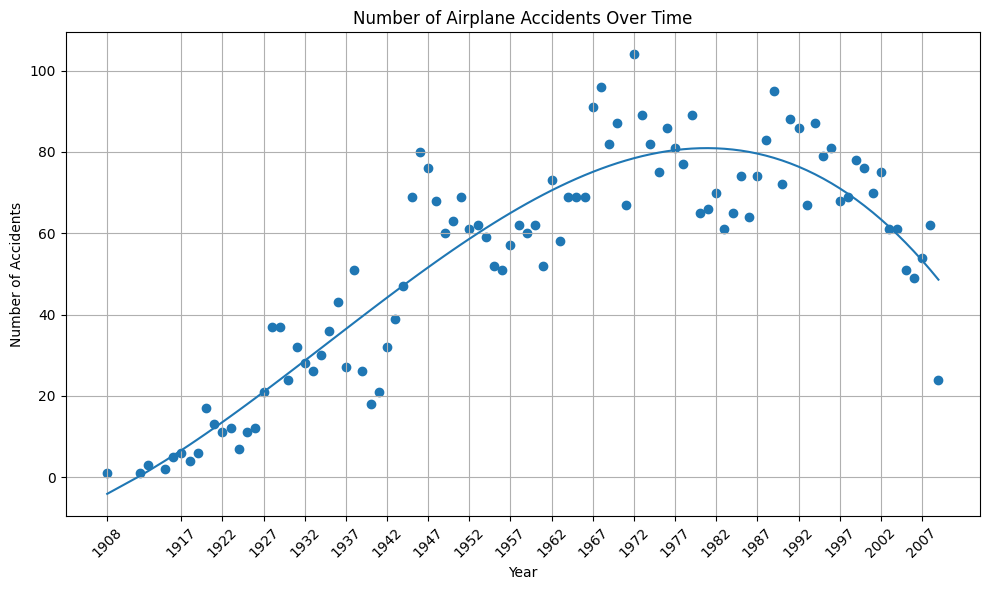

In [47]:
data.crashes_over_time_regression()

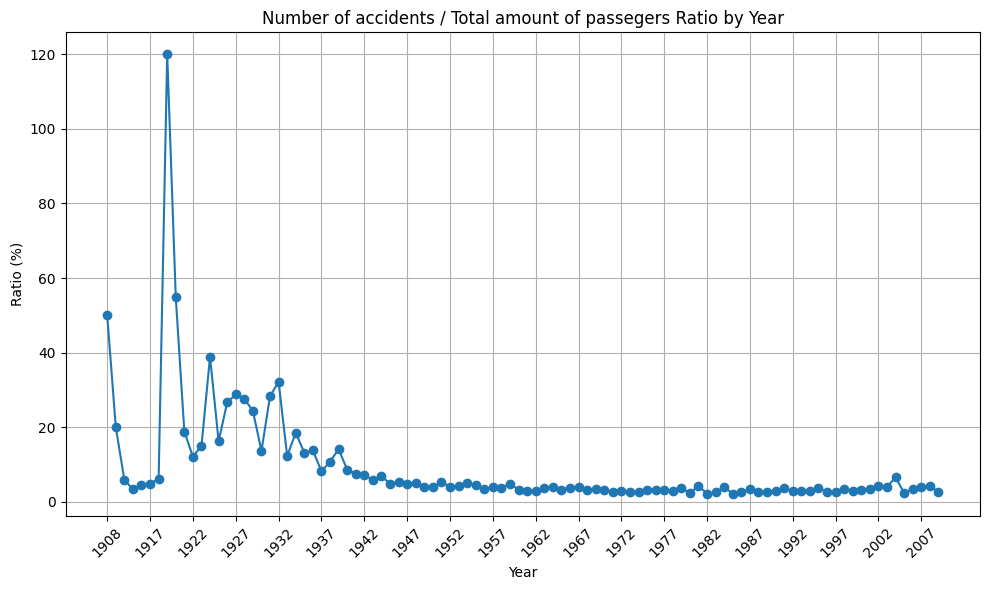

In [48]:
data.ratio_over_time()

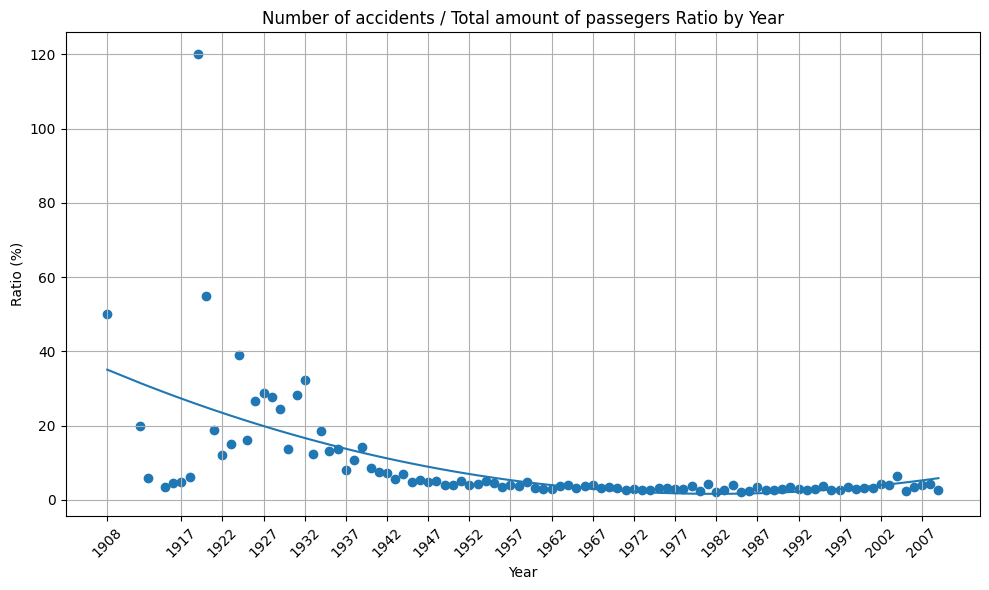

In [49]:
data.ratio_over_time_regression()

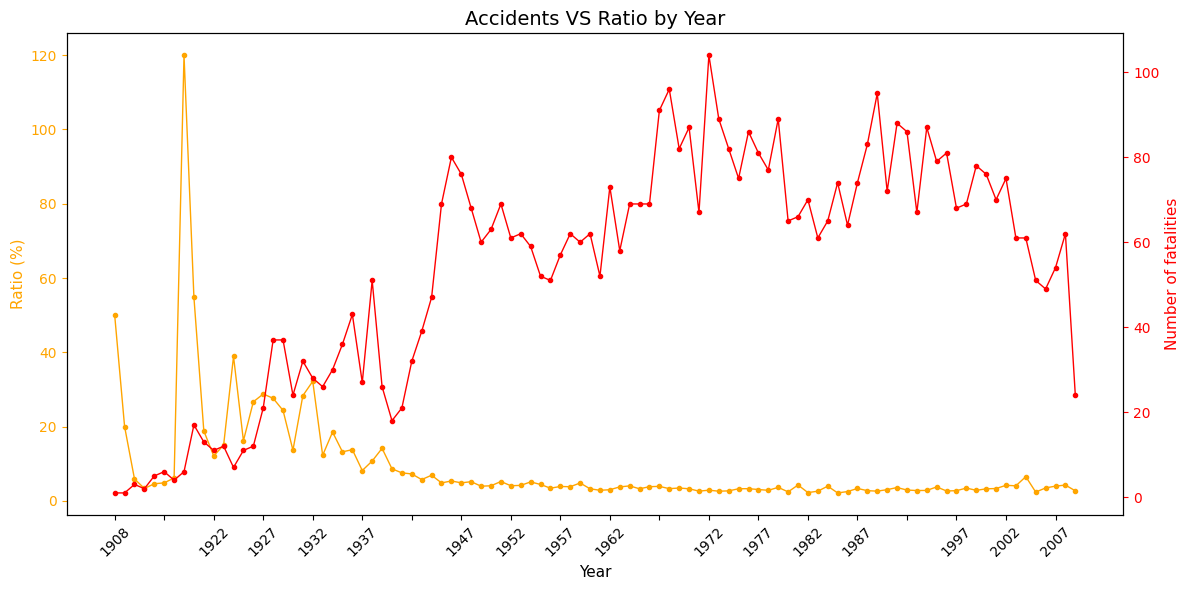

In [50]:
data.fatilities_vs_ratio()

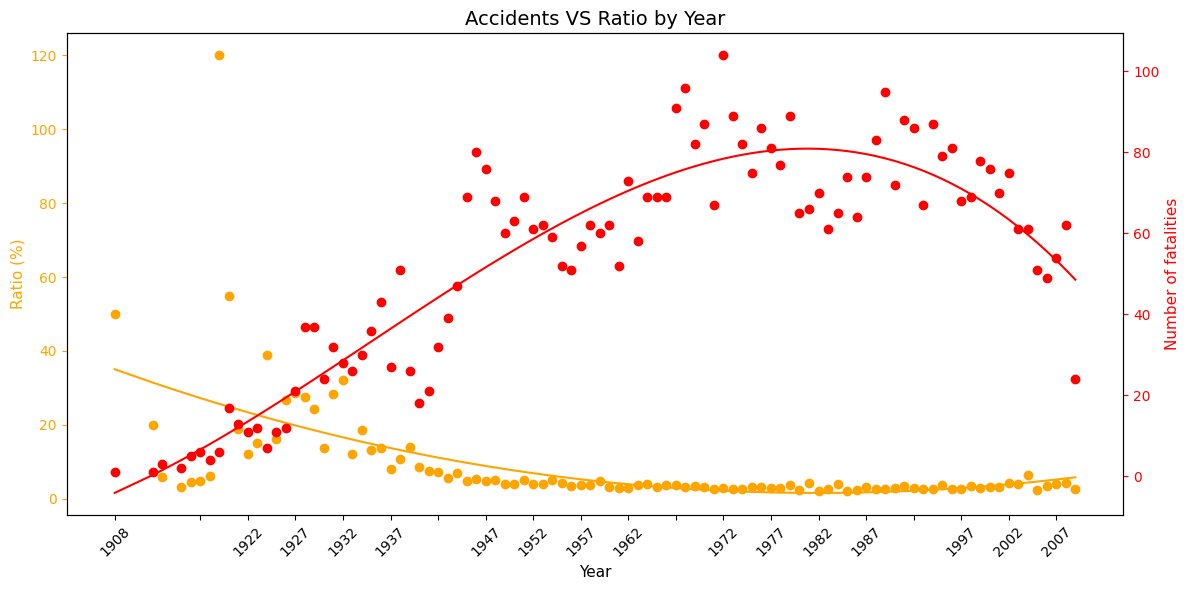

In [51]:
data.fatilities_vs_ratio_regression()

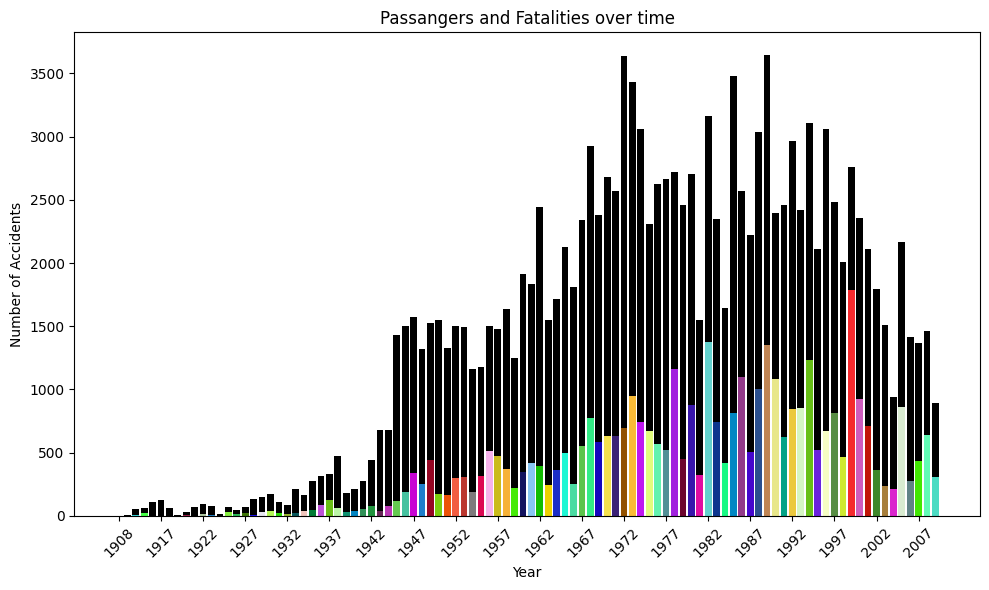

In [52]:
data.passanger_and_fatalities_over_time()

Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


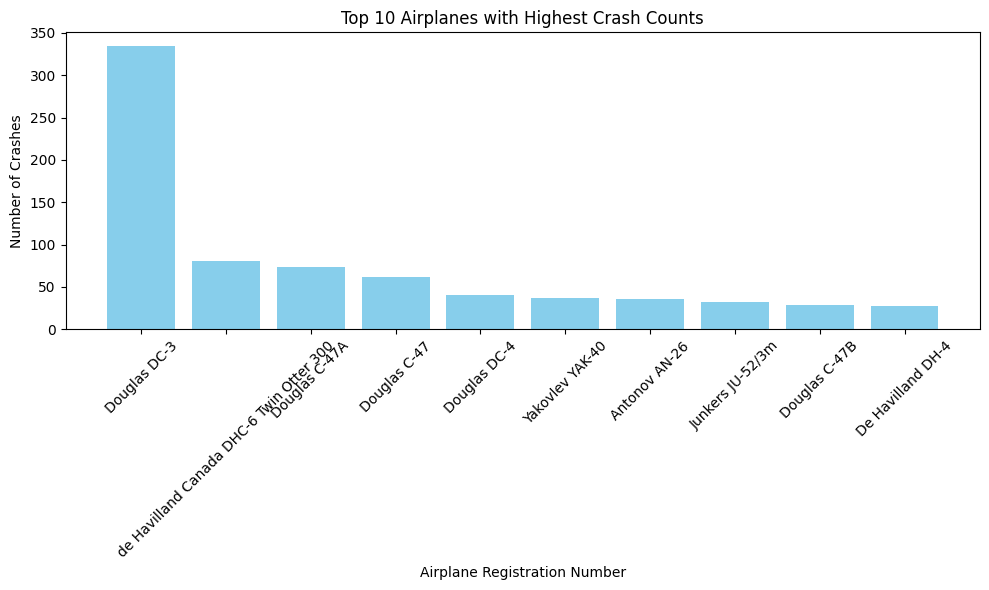

In [53]:
data.highest_crash_counts() #En čas edino prevozniško letalo. 

209


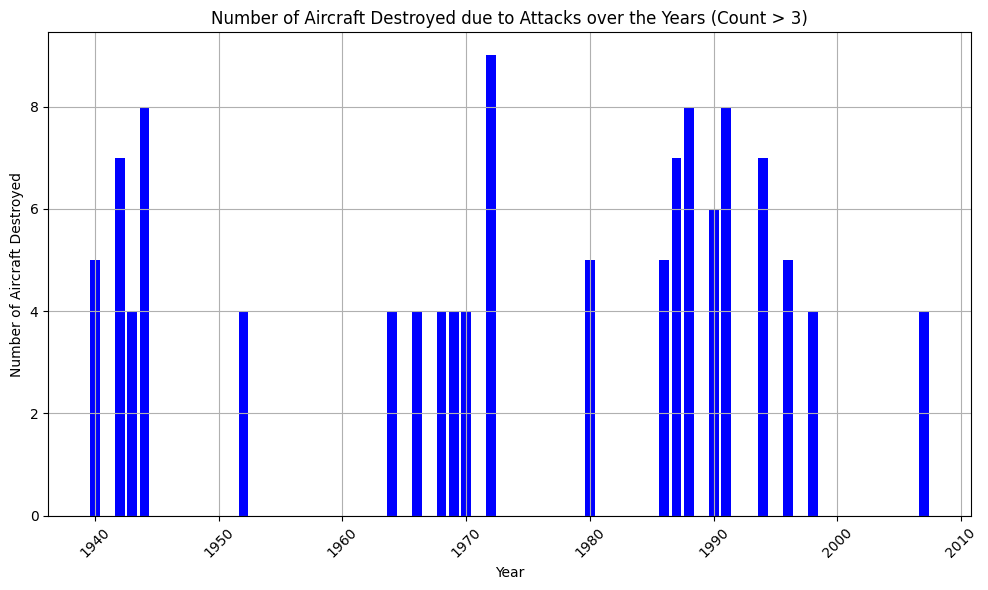

In [54]:
import matplotlib.pyplot as plt
import numpy as np


def unicena_letala():
    unicena = data.extract_data_from_summary(["shoot", "shot", "attack"], ["overshoot", "undershoot"], "Summary")
    print(len(unicena))
    years, counts = np.unique([entry['Date'][-4:] for entry in unicena], return_counts=True)

    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]

    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


unicena_letala() 
#Lahko izpišemo še kraj
#1940 - 2 svetovna vojna
#1960 - Vietnamska vojna
#1980 - Falklandska vojna
#1990 - Sovjetska zveza, Jugoslavija...

**Faulty design**

In [55]:
extracted = data.extract_data_from_summary(["faulty design", "design flaw", "design deficiencies"], [], "Summary")
print(len(extracted))


16


**Water**

In [56]:
extracted = data.extract_data_from_summary(["ocean", "water", "swamp", "sea", "river"], [], "Summary")
print(len(extracted))


617


**Low fuel**

In [57]:
extracted = data.extract_data_from_summary(["low fuel", "fuel exhaustion", "ran out of fuel", "running out of fuel"], [], "Summary")
print(len(extracted))


66


**Birds**

In [58]:
extracted = data.extract_data_from_summary(["bird", "geese", "flock"], [], "Summary")
print(len(extracted))

12


### Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

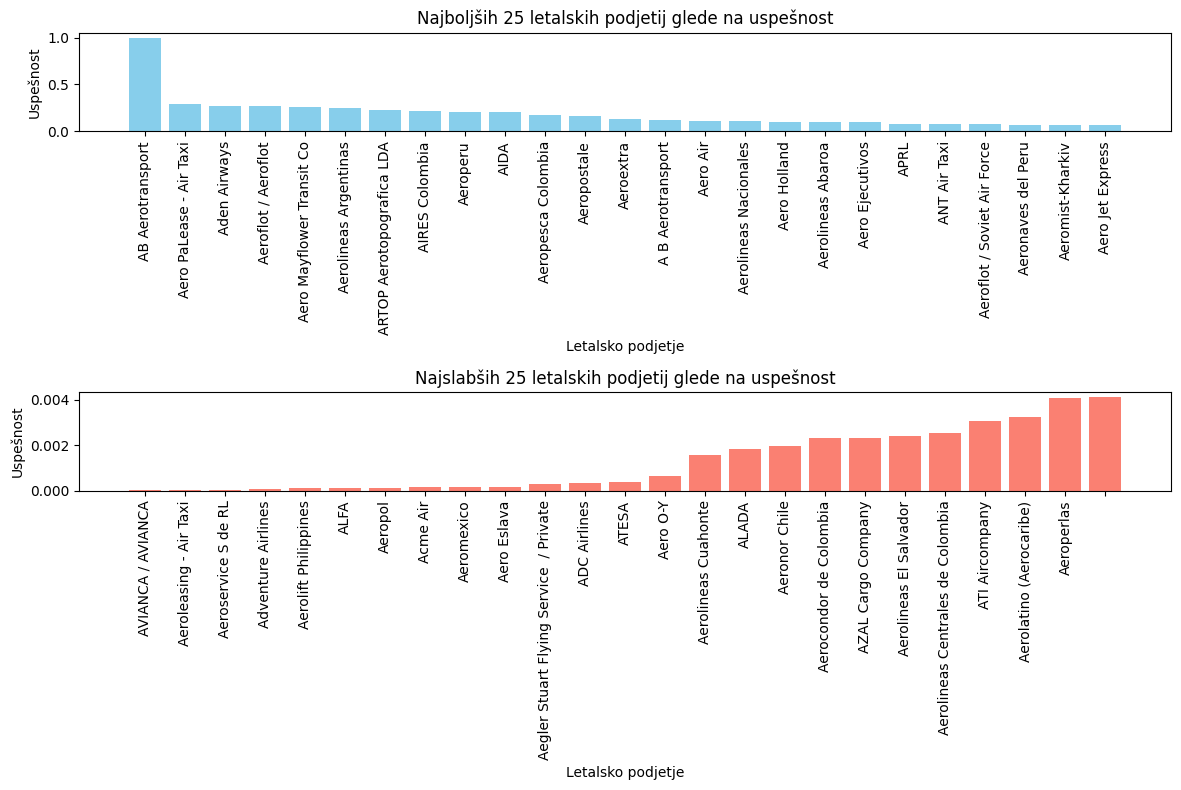

In [59]:
data.operator_performance() # Še enkrat v ChatGPT ali pa razmislimo

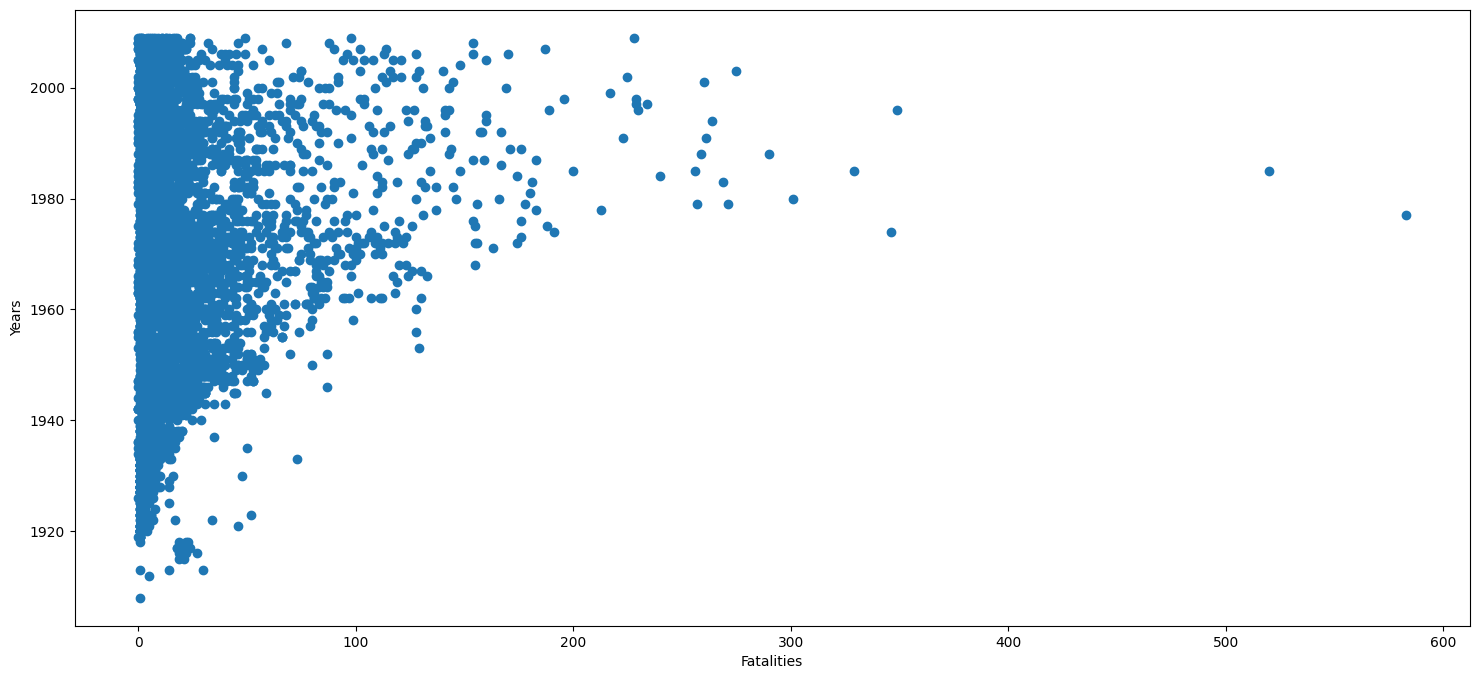

In [60]:
data.deaths_over_time()

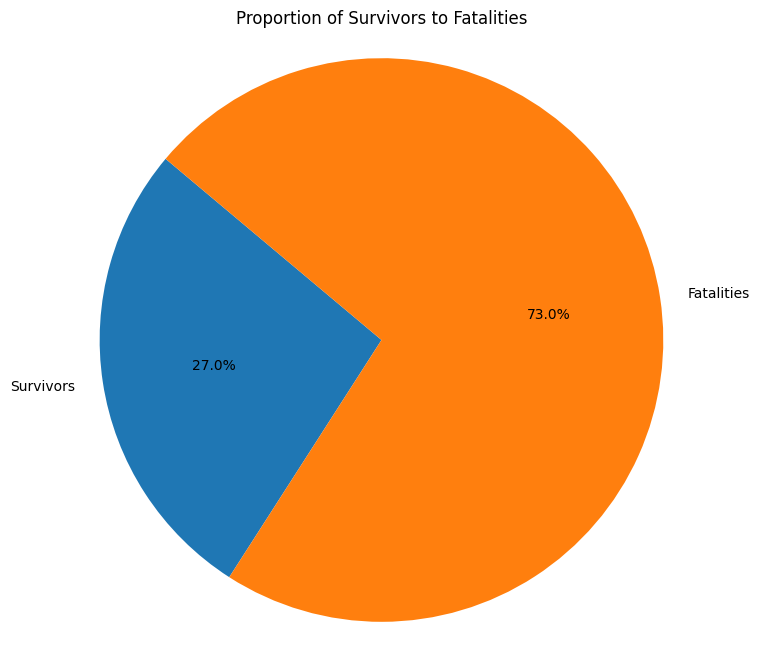

In [61]:
data.ratio_between_aboard_fatal()

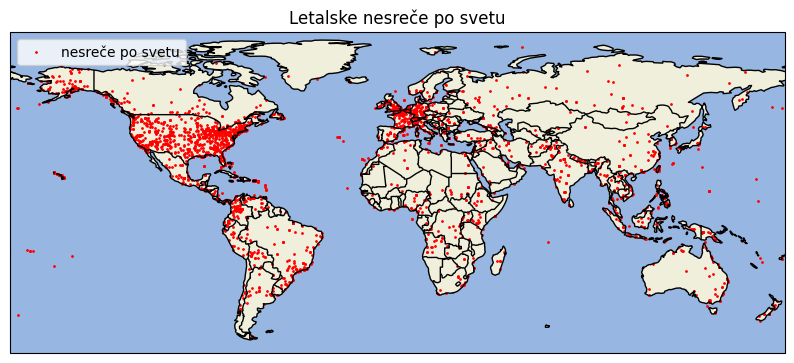

In [62]:
data.crash_locations_on_map()

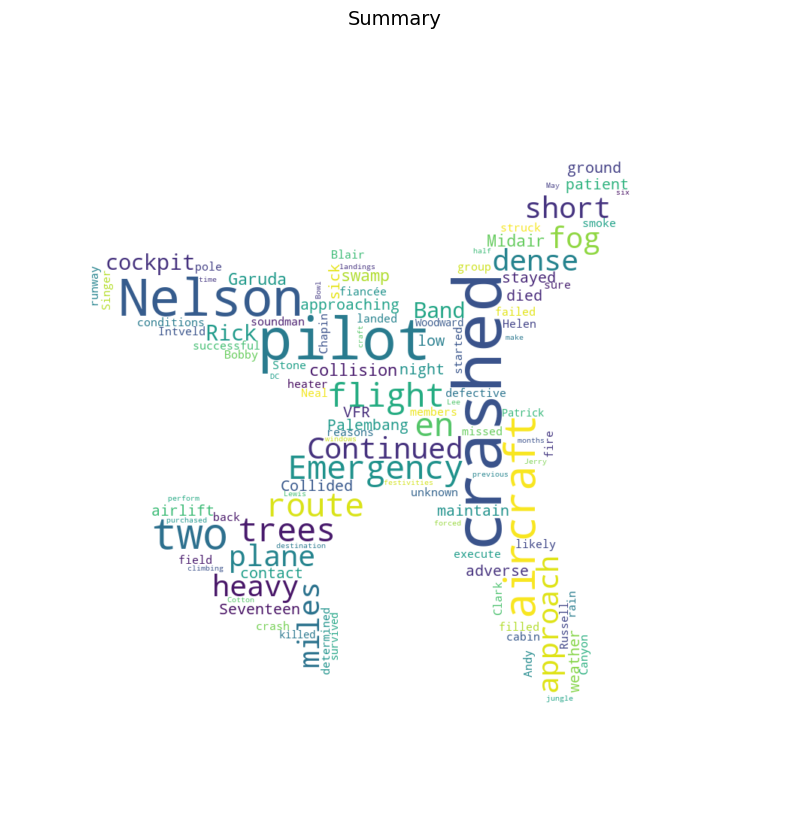

In [63]:
data.wordcloud('Summary')

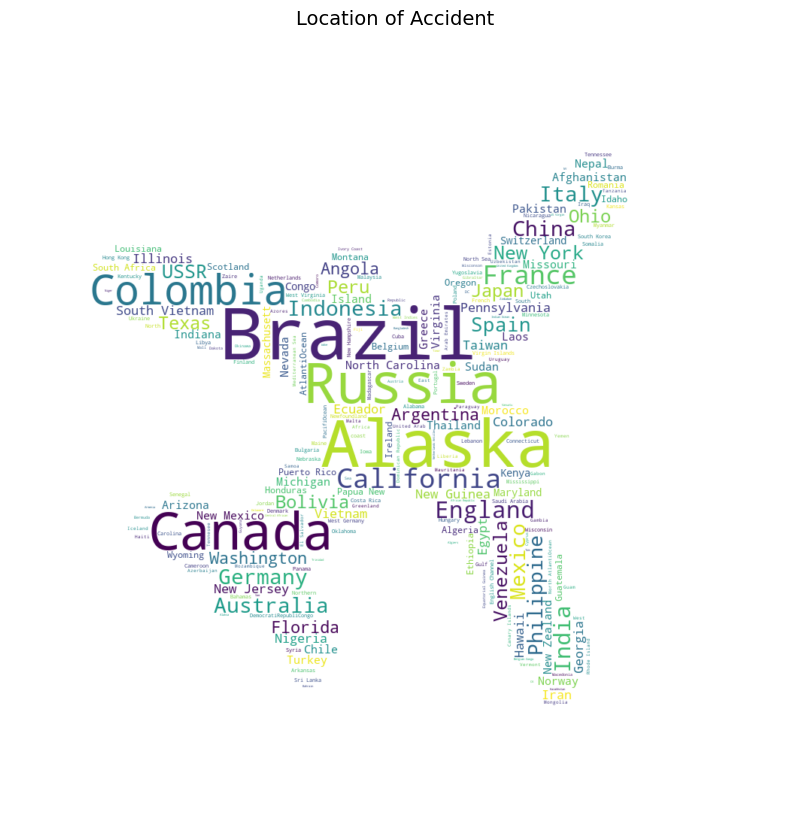

In [64]:
data.countrycloud('Location')

In [65]:
top_operators = data.top_operators('Operator', 3)
print("Operatorji z največ nesrečami:")
for operator, count in top_operators:
    print(f"{operator}: {count} nesreč")

Operatorji z največ nesrečami:
Aeroflot: 179 nesreč
Military - U.S. Air Force: 176 nesreč
Air France: 70 nesreč


Zanimivo je da je največ nesreč bilo pri Ruskemu operatorju in sicer Aeroflot. Pa raziscimo malo...

Narisimo graf, ki bo prikazoval st. nesrec operatorja Aeroflot vsako leto.

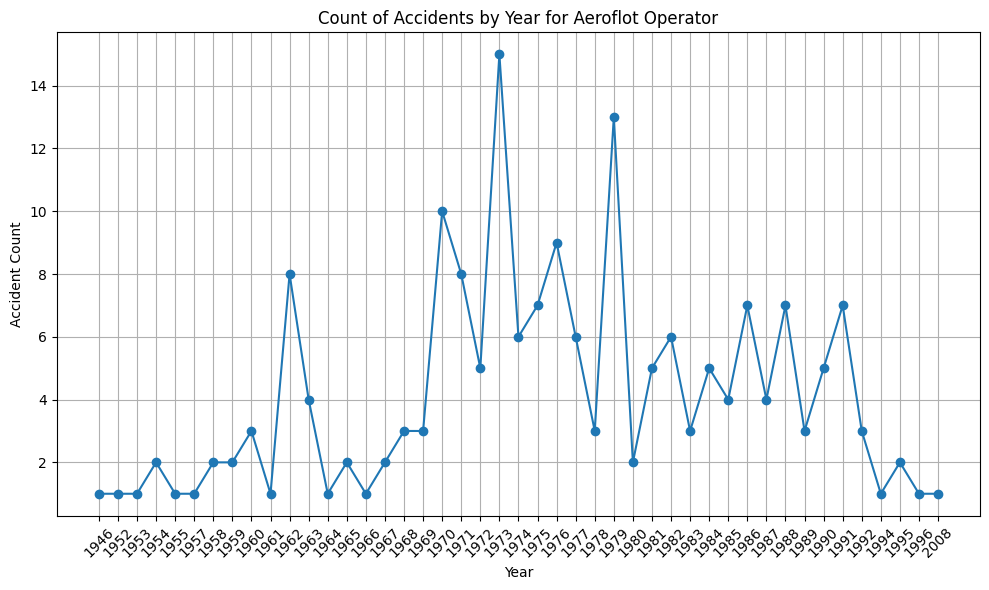

In [66]:
data.count_of_accidents_by_year_operator()

Opazimo da je prišlo do veliko nesreč med letom 1970 in 1990. Po krajšem brskanju na internetu imamo celo wikipedia članek na to temo.
https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s


In [67]:
print(data.aeroflot_podatki)

AttributeError: 'Data' object has no attribute 'aeroflot_podatki'